In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unzip "/content/drive/MyDrive/Brain Tumor Dataset.zip" -d "/content/Brain Tumor Dataset"



Archive:  /content/drive/MyDrive/Brain Tumor Dataset.zip
  inflating: /content/Brain Tumor Dataset/Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1).jpg  
  inflating: /content/Brain Tumor Dataset/Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1).png  
  inflating: /content/Brain Tumor Dataset/Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1).tif  
  inflating: /content/Brain Tumor Dataset/Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (10).jpg  
  inflating: /content/Brain Tumor Dataset/Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (10).tif  
  inflating: /content/Brain Tumor Dataset/Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (100).jpg  
  inflating: /content/Brain Tumor Dataset/Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1000).jpg  
  inflating: /content/Brain Tumor Dataset/Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1001).jpg  
  inflating: /content/Brain T

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import os
import math
import shutil
import glob

In [4]:
ROOT_DIR = '/content/Brain Tumor Dataset/Brain Tumor Data Set/Brain Tumor Data Set'
number_of_images = {}
for dir in os.listdir(ROOT_DIR):
  number_of_images[dir] = len(os.listdir(os.path.join(ROOT_DIR, dir)))

number_of_images.items()

dict_items([('Healthy', 2087), ('Brain Tumor', 2513)])

In [5]:
if not os.path.exists('./train'):
  os.mkdir('./train')
  for dir in os.listdir(ROOT_DIR):
    os.makedirs('./train/' + dir)
    for img in np.random.choice(a=os.listdir(os.path.join(ROOT_DIR, dir)), size = (math.floor(0.7 * number_of_images[dir]) - 5), replace = False):
      O = os.path.join(ROOT_DIR, dir, img)
      D = os.path.join('./train', dir)
      shutil.copy(O,D)
      os.remove(O)
else:
  print('Folder already exists')

In [6]:
def dataFolder(p, split):
  if not os.path.exists('./' + p):
    os.mkdir('./' + p)
    for dir in os.listdir(ROOT_DIR):
      os.makedirs('./' + p + '/' + dir)
      for img in np.random.choice(a=os.listdir(os.path.join(ROOT_DIR, dir)), size = (math.floor(split * number_of_images[dir]) - 5), replace = False):
        O = os.path.join(ROOT_DIR, dir, img)
        D = os.path.join('./' + p, dir)
        shutil.copy(O,D)
        os.remove(O)
  else:
    print( f"{p} Folder already exists")


In [7]:
dataFolder("train", 0.7)

train Folder already exists


In [8]:
dataFolder("val", 0.15)

In [9]:
dataFolder("test", 0.15)

In [10]:
number_of_images = {}
for dir in os.listdir(ROOT_DIR):
  number_of_images[dir] = len(os.listdir(os.path.join(ROOT_DIR, dir)))

number_of_images.items()

dict_items([('Healthy', 16), ('Brain Tumor', 17)])

In [11]:
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, BatchNormalization, GlobalAvgPool2D
from keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import keras

In [12]:
model = Sequential()
model.add(Conv2D(filters = 16, kernel_size = (3,3), activation = 'relu', input_shape = (224,224,3)))

model.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Dropout(rate = 0.25))

model.add(Flatten())
model.add(Dense(units = 64, activation='relu'))

model.add(Dropout(rate = 0.25))
model.add(Dense(units = 1, activation='sigmoid'))

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 220, 220, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 110, 110, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 108, 108, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     5,537,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,635,361 (21.50 MB)

 Trainable params: 5,635,361 (21.50 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
model.compile(optimizer = 'adam', loss = keras.losses.binary_crossentropy, metrics = ['accuracy'])

In [64]:
from keras.models import Model
from keras.applications.mobilenet import MobileNet, preprocess_input

In [65]:
def preprocessingImages(path):
  image_data = ImageDataGenerator(zoom_range= 0.2, shear_range= 0.2, preprocessing_function= preprocess_input, horizontal_flip= True)
  image = image_data.flow_from_directory(directory = path, target_size = (224,224), batch_size = 32, class_mode = 'binary')

  return image

In [66]:
path = '/content/train'
train_data = preprocessingImages(path)

Found 3209 images belonging to 2 classes.


In [67]:
def preprocessingImages2(path):
  image_data = ImageDataGenerator(preprocessing_function= preprocess_input)
  image = image_data.flow_from_directory(directory = path, target_size = (224,224), batch_size = 32, class_mode = 'binary')

  return image

In [68]:
path = '/content/test'
test_data = preprocessingImages2(path)

Found 679 images belonging to 2 classes.


In [69]:
path = '/content/val'
val_data = preprocessingImages2(path)

Found 679 images belonging to 2 classes.


In [19]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [24]:
es = EarlyStopping(monitor = 'val_accuracy', min_delta = 0.01, patience = 6, verbose = 1, mode = 'auto')
mc = ModelCheckpoint(monitor = 'val_accuracy', filepath = './bestmodel.h5', save_best_only = True, verbose = 1, mode = 'auto')
cb = [es, mc]

In [25]:
hs = model.fit(train_data,
                         steps_per_epoch = 8,
                         epochs = 30,
                         verbose = 1,
                         validation_data = val_data,
                         validation_steps = 16,
                         callbacks = cb)

Epoch 1/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 548ms/step - accuracy: 0.6359 - loss: 0.6296
Epoch 1: val_accuracy improved from -inf to 0.65820, saving model to ./bestmodel.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 876ms/step - accuracy: 0.6334 - loss: 0.6320 - val_accuracy: 0.6582 - val_loss: 0.6079
Epoch 2/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step - accuracy: 0.7147 - loss: 0.6073
Epoch 2: val_accuracy improved from 0.65820 to 0.74609, saving model to ./bestmodel.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 594ms/step - accuracy: 0.7086 - loss: 0.6078 - val_accuracy: 0.7461 - val_loss: 0.5761
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step - accuracy: 0.6674 - loss: 0.6028
Epoch 3: val_accuracy did not improve from 0.74609
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 618ms/step - accuracy: 0.6679 - loss: 0.6041 - val_accuracy: 0.6973 - val_loss: 0.5811
Epoch 4/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step - accuracy: 0.6753 - loss: 0.6153
Epoch 4: val_accuracy did not improve from 0.74609
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 668ms/step - accuracy: 0.6697 - loss: 0.6191 - val_accuracy: 0.7012 - val_loss: 0.6065
Epoch 5/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step - accuracy: 0.6905 - loss: 0.6342
Epoch 5: val_accuracy did not improve from 0.74609
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 641ms/step - accuracy: 0.6880 - loss: 0.6343 - val_accuracy: 0.6602 - val_loss: 0.6056
Epoch 6/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step - accuracy: 0.6492 - loss: 0.6001
Epoch 6: val_accuracy did not improve from 0.74609


8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 769ms/step - accuracy: 0.6880 - loss: 0.6188 - val_accuracy: 0.7598 - val_loss: 0.5377
Epoch 8/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step - accuracy: 0.6844 - loss: 0.6099
Epoch 8: val_accuracy did not improve from 0.75977
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 515ms/step - accuracy: 0.6830 - loss: 0.6097 - val_accuracy: 0.7520 - val_loss: 0.5230
Epoch 9/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step - accuracy: 0.7262 - loss: 0.5418
Epoch 9: val_accuracy improved from 0.75977 to 0.79297, saving model to ./bestmodel.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 564ms/step - accuracy: 0.7249 - loss: 0.5414 - val_accuracy: 0.7930 - val_loss: 0.5032
Epoch 10/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step - accuracy: 0.7370 - loss: 0.5404
Epoch 10: val_accuracy improved from 0.79297 to 0.81641, saving model to ./bestmodel.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 874ms/step - accuracy: 0.7376 - loss: 0.5400 - val_accuracy: 0.8164 - val_loss: 0.4657
Epoch 11/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step - accuracy: 0.7903 - loss: 0.4766
Epoch 11: val_accuracy did not improve from 0.81641
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 388ms/step - accuracy: 0.7901 - loss: 0.4786 - val_accuracy: 0.7324 - val_loss: 0.5229
Epoch 12/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step - accuracy: 0.6706 - loss: 0.5966
Epoch 12: val_accuracy did not improve from 0.81641
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 695ms/step - accuracy: 0.6742 - loss: 0.5927 - val_accuracy: 0.8145 - val_loss: 0.4642
Epoch 13/30
5/8 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.7484 - loss: 0.4811

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 13: val_accuracy improved from 0.81641 to 0.82422, saving model to ./bestmodel.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 348ms/step - accuracy: 0.7490 - loss: 0.4917 - val_accuracy: 0.8242 - val_loss: 0.4659
Epoch 14/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 570ms/step - accuracy: 0.7406 - loss: 0.5661
Epoch 14: val_accuracy did not improve from 0.82422
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 781ms/step - accuracy: 0.7438 - loss: 0.5627 - val_accuracy: 0.8242 - val_loss: 0.4466
Epoch 15/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step - accuracy: 0.7441 - loss: 0.5696
Epoch 15: val_accuracy did not improve from 0.82422
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 666ms/step - accuracy: 0.7452 - loss: 0.5677 - val_accuracy: 0.8047 - val_loss: 0.4361
Epoch 16/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step - accuracy: 0.7662 - loss: 0.5325
Epoch 16: val_accuracy did not improve from 0.82422
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 439ms/step - accuracy: 0.7661 - loss: 0.5328 - val_accuracy: 0.7949 - val_loss: 0.4548
Epoch 16: early stopping


In [26]:
h = hs.history
h.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

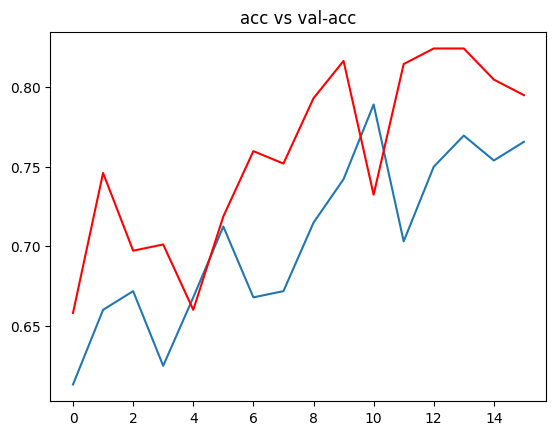

In [27]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'], c = 'red')
plt.title('acc vs val-acc')
plt.show()

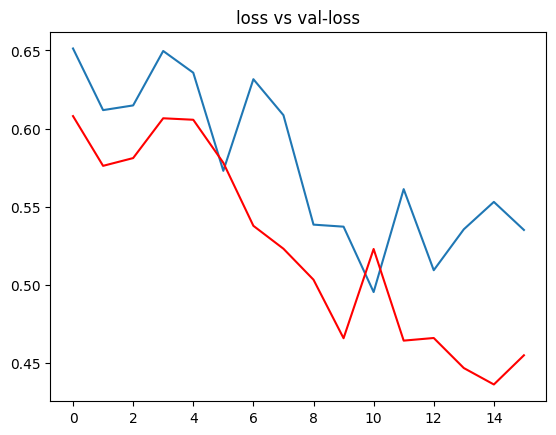

In [28]:
plt.plot(h['loss'])
plt.plot(h['val_loss'], c = 'red')
plt.title('loss vs val-loss')
plt.show()

In [29]:
from keras.models import load_model

model = load_model('/content/bestmodel.h5')

In [34]:
acc = model.evaluate(test_data)[1]
print(f"The accuracy of our model is {acc*100} %")

22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - accuracy: 0.8299 - loss: 0.4377
The accuracy of our model is 83.21060538291931 %


In [35]:
from keras.preprocessing.image import load_img, img_to_array

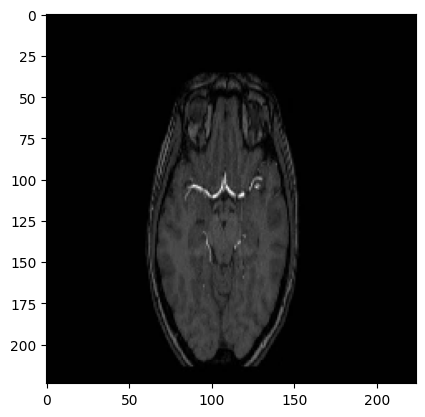

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
The MRI image shows no signs of Brain Tumor
[[0.9956364]]


In [86]:
path = '/content/Brain Tumor Dataset/Brain Tumor Data Set/Brain Tumor Data Set/Healthy/Not Cancer  (350).jpg'
img = load_img(path, target_size = (224,224))
input_arr = img_to_array(img)/255

plt.imshow(input_arr)
plt.show()

input_arr.shape

input_arr = np.expand_dims(input_arr, axis = 0)
pred = model.predict(input_arr)
pred

if pred < 0.5:
  print('The MRI image has a brain tumor')
else:
  print('The MRI image shows no signs of Brain Tumor')

print(pred)

In [41]:
train_data.class_indices

{'Brain Tumor': 0, 'Healthy': 1}

In [70]:
base_model = MobileNet(input_shape= (224,224,3), include_top = False)

17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [71]:
for layer in base_model.layers:
  layer.trainable = False

In [73]:
X = Flatten()(base_model.output)
X = Dense(units = 1, activation = 'sigmoid')(X)

model = Model(base_model.input, X)

In [74]:
model.compile(optimizer = 'rmsprop', loss = keras.losses.binary_crossentropy, metrics = ['accuracy'])

In [76]:
mc = ModelCheckpoint(monitor = 'val_accuracy', filepath = 'bestmodel.h5', save_best_only = True, verbose = 1)

es = EarlyStopping(monitor = 'val_accuracy', min_delta = 0.01, patience = 3, verbose = 1)

cb = [mc, es]

In [77]:
hist = model.fit(train_data,
                 steps_per_epoch = 8,
                 epochs = 30,
                 validation_data = val_data,
                 validation_steps = 16,
                 callbacks = cb)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step - accuracy: 0.6968 - loss: 3.8713
Epoch 1: val_accuracy improved from -inf to 0.76367, saving model to bestmodel.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.6958 - loss: 4.0909 - val_accuracy: 0.7637 - val_loss: 1.8843
Epoch 2/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step - accuracy: 0.8106 - loss: 1.6474
Epoch 2: val_accuracy did not improve from 0.76367
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.8108 - loss: 1.6192 - val_accuracy: 0.7324 - val_loss: 2.4845
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step - accuracy: 0.8750 - loss: 0.7019
Epoch 3: val_accuracy did not improve from 0.76367
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 783ms/step - accuracy: 0.8750 - loss: 0.7129 - val_accuracy: 0.5879 - val_loss: 6.0545
Epoch 4/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step - accuracy: 0.7514 - loss: 2.3909
Epoch 4: val_accuracy improved from 0.76367 to 0.89258, saving model to bestmodel.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 723ms/step - accuracy: 0.7504 - loss: 2.3789 - val_accuracy: 0.8926 - val_loss: 1.0924
Epoch 5/30
7/8 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.8938 - loss: 1.1715
Epoch 5: val_accuracy did not improve from 0.89258
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 311ms/step - accuracy: 0.8835 - loss: 1.2460 - val_accuracy: 0.8203 - val_loss: 1.6205
Epoch 6/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step - accuracy: 0.9004 - loss: 0.7234
Epoch 6: val_accuracy did not improve from 0.89258
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 830ms/step - accuracy: 0.9015 - loss: 0.7047 - val_accuracy: 0.8730 - val_loss: 0.8380
Epoch 7/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - accuracy: 0.9173 - loss: 0.7814
Epoch 7: val_accuracy improved from 0.89258 to 0.95703, saving model to bestmodel.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 674ms/step - accuracy: 0.9169 - loss: 0.7778 - val_accuracy: 0.9570 - val_loss: 0.1832
Epoch 8/30
7/8 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9317 - loss: 0.2997
Epoch 8: val_accuracy did not improve from 0.95703
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 310ms/step - accuracy: 0.9330 - loss: 0.3141 - val_accuracy: 0.9316 - val_loss: 0.4045
Epoch 9/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step - accuracy: 0.8727 - loss: 0.8098
Epoch 9: val_accuracy did not improve from 0.95703
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 890ms/step - accuracy: 0.8704 - loss: 0.8559 - val_accuracy: 0.9453 - val_loss: 0.3419
Epoch 10/30
7/8 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9266 - loss: 0.4227
Epoch 10: val_accuracy did not improve from 0.95703
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 232ms/step - accuracy: 0.9324 - loss: 0.3795 - val_accuracy: 0.8867 - val_loss: 0.8389
Epoch 10: early stopping


In [78]:
model = load_model('/content/bestmodel.h5')

In [81]:
acc = model.evaluate(test_data)[1]
print(f'The model accuracy is {acc*100} %')

22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 87ms/step - accuracy: 0.9485 - loss: 0.2493
The model accuracy is 94.40353512763977 %


In [82]:
h = hist.history
h.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

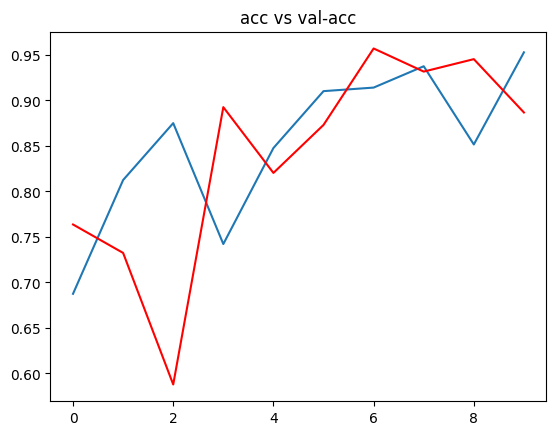

In [83]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'], c = 'red')
plt.title('acc vs val-acc')
plt.show()

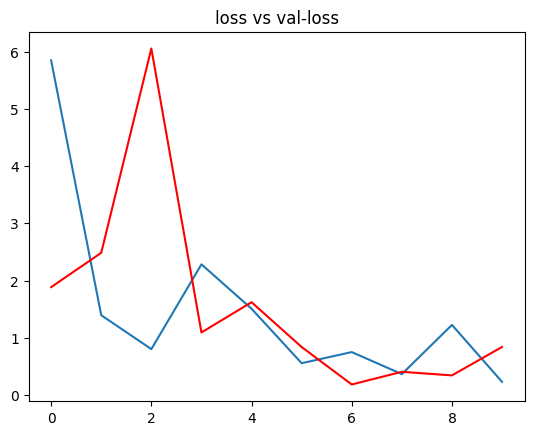

In [84]:
plt.plot(h['loss'])
plt.plot(h['val_loss'], c = 'red')
plt.title('loss vs val-loss')
plt.show()

In [88]:
from keras.preprocessing import image

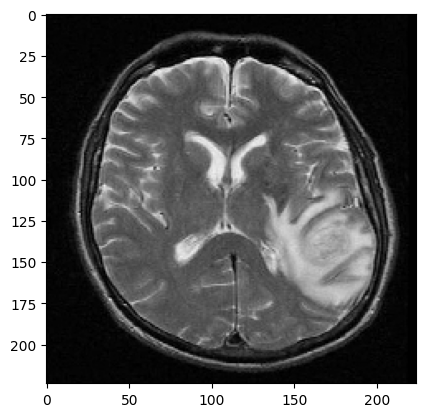

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
The MRI image has a brain tumor
[[3.2622716e-05]]


In [100]:
path = '/content/Brain Tumor Dataset/Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (988).jpg'
img = load_img(path, target_size = (224,224))
input_arr = img_to_array(img)/255

plt.imshow(input_arr)
plt.show()

input_arr.shape

input_arr = np.expand_dims(input_arr, axis = 0)
pred = model.predict(input_arr)
pred

if pred < 0.5:
  print('The MRI image has a brain tumor')
else:
  print('The MRI image shows no signs of Brain Tumor')

print(pred)